## Word cloud for the Crime description for the data set taken!


In [29]:
import pandas as pd
import io
import requests
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("./Crime_Data_from_2020_to_Present_Recent.csv")

In [6]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,190101087,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,510,1,Central,156,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,IC,Invest Cont,626,NaN,NaN,NaN,300 E 5TH ST,NaN,34.0449,-118.2458
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [7]:
with pd.option_context('display.max_columns', None):
    display(df.head())

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,190101087,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,510,1,Central,156,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,1414 1218 2000 1814 0416 0447,53,F,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,626,NaN,NaN,NaN,300 E 5TH ST,NaN,34.0449,-118.2458
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [11]:
df.isnull().sum() #Checking Null Values

DR_NO                 0
Date Rptd             0
DATE OCC              0
TIME OCC              0
AREA                  0
AREA NAME             0
Rpt Dist No           0
Part 1-2              0
Crm Cd                0
Crm Cd Desc           0
Mocodes            5241
Vict Age              0
Vict Sex           4952
Vict Descent       4952
Premis Cd             1
Premis Desc          19
Weapon Used Cd    29828
Weapon Desc       29828
Status                0
Status Desc           0
Crm Cd 1              0
Crm Cd 2          43658
Crm Cd 3          47143
Crm Cd 4          47248
LOCATION              0
Cross Street      38860
LAT                   0
LON                   0
dtype: int64

In [12]:
import missingno as mn

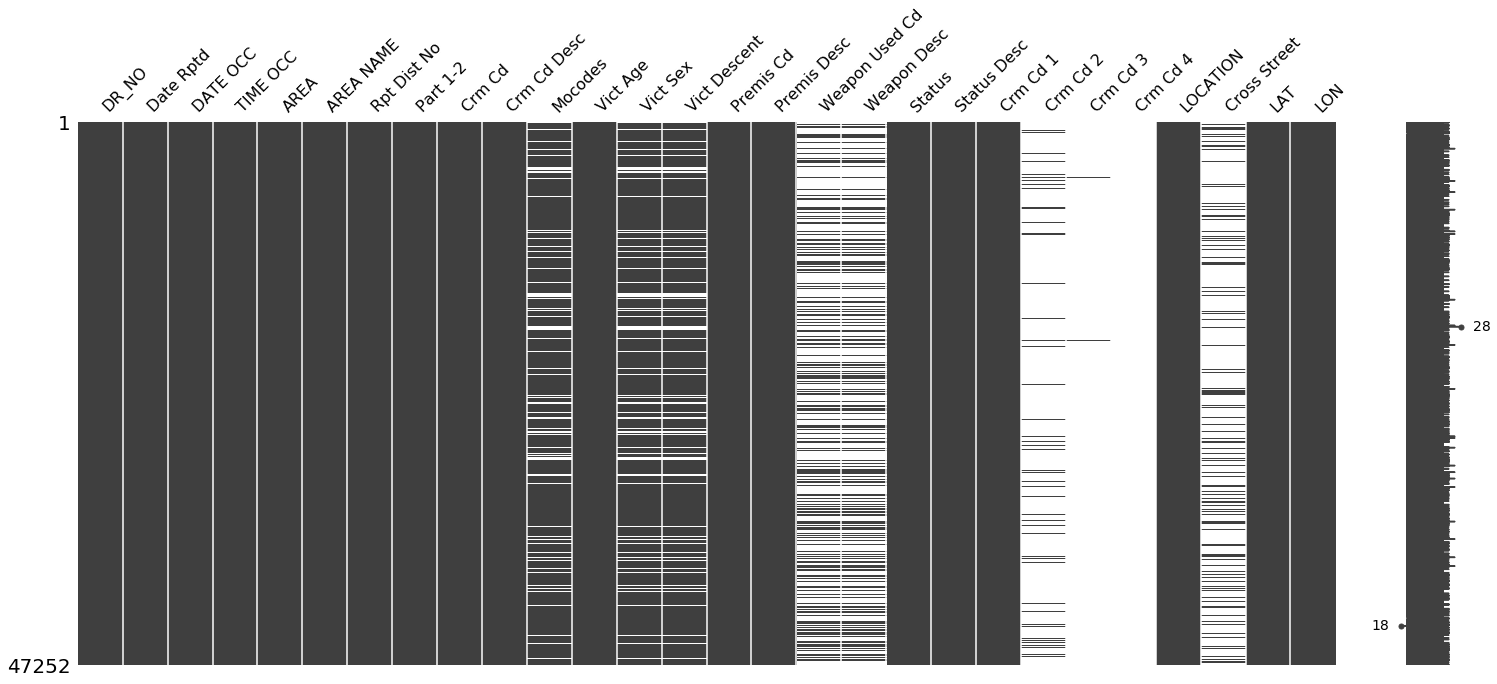

In [15]:
mn.matrix(df) #Highlevel  visualization of missing values

In [16]:
df = df.rename(columns = {'Crm Cd Desc':'CrimeCodeDesc'})

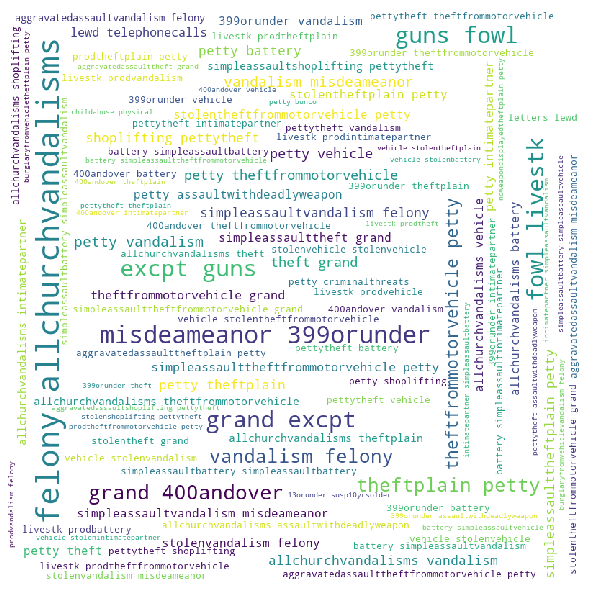

In [31]:
comment_words =''
stopwords = set(STOPWORDS)
for val in df.CrimeCodeDesc:
    val =str(val)
    tokens=val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    for words in tokens:
        comment_words = comment_words + words + ''
wordcloud = WordCloud(width= 800, height = 800, background_color = 'white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8,8), facecolor =None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()